# Import Dependencies

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [2]:
data = pd.read_csv("India Agriculture Crop Production.csv")

In [3]:
data.head(5)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


# EDA process

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [5]:
data.isna().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [6]:
data.shape

(345407, 10)

In [7]:
data = data.dropna()

In [8]:
data.isna().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

In [9]:
# checking for duplicate value
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
345370    False
345371    False
345372    False
345373    False
345374    False
Length: 340414, dtype: bool

In [10]:
# Statistics of data

data_stats = data.describe()
print("Statistics of Data\n",data_stats)

Statistics of Data
                Area    Production          Yield
count  3.404140e+05  3.404140e+05  340414.000000
mean   1.182535e+04  9.583711e+05      80.564577
std    4.612484e+04  2.152986e+07     923.232000
min    8.000000e-03  0.000000e+00       0.000000
25%    8.000000e+01  8.700000e+01       0.567920
50%    5.630000e+02  7.170000e+02       1.025000
75%    4.257000e+03  7.176000e+03       2.500000
max    8.580100e+06  1.597800e+09   43958.333333


In [11]:
# checking the unique values
unique_val = data.nunique()
print("Unique value of each columns\n",unique_val)

Unique value of each columns
 State                   36
District               728
Crop                    56
Year                    24
Season                   6
Area                 47949
Area Units               1
Production           69078
Production Units         3
Yield               197154
dtype: int64


# Analysis and Visualization of data


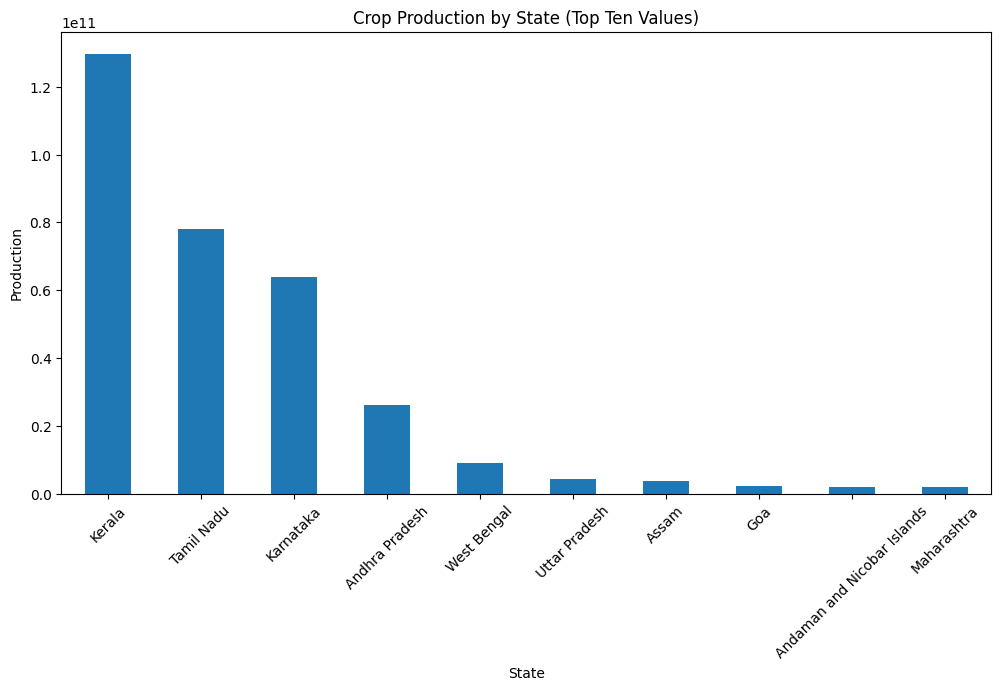

State
Kerala                        1.30e+11
Tamil Nadu                    7.81e+10
Karnataka                     6.38e+10
Andhra Pradesh                2.61e+10
West Bengal                   8.94e+09
Uttar Pradesh                 4.44e+09
Assam                         3.64e+09
Goa                           2.19e+09
Andaman and Nicobar Islands   2.05e+09
Maharashtra                   1.88e+09
Name: Production, dtype: float64


In [12]:
# crop production of state

crop_by_state = data.groupby('State')['Production'].sum().sort_values(ascending=False)[0:10]
pd.options.display.float_format = '{:.2e}'.format

plt.figure(figsize=(12, 6))
crop_by_state.plot(kind='bar')
plt.title('Crop Production by State (Top Ten Values)')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()

print(crop_by_state)

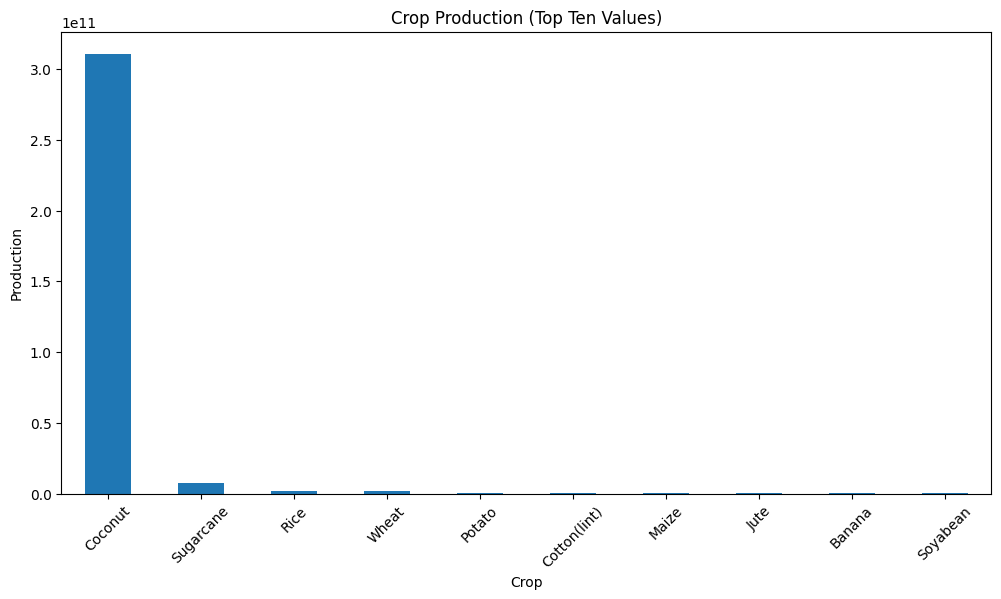

Crop
Coconut        3.11e+11
Sugarcane      7.24e+09
Rice           2.24e+09
Wheat          2.01e+09
Potato         6.32e+08
Cotton(lint)   4.84e+08
Maize          4.44e+08
Jute           2.30e+08
Banana         2.27e+08
Soyabean       2.12e+08
Name: Production, dtype: float64


In [13]:
# Crop production by crop type
crop_by_crop = data.groupby('Crop')['Production'].sum().sort_values(ascending=False)[0:10]
pd.options.display.float_format = '{:.2e}'.format

plt.figure(figsize=(12, 6))
crop_by_crop.plot(kind='bar')
plt.title('Crop Production (Top Ten Values)')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()

print(crop_by_crop)

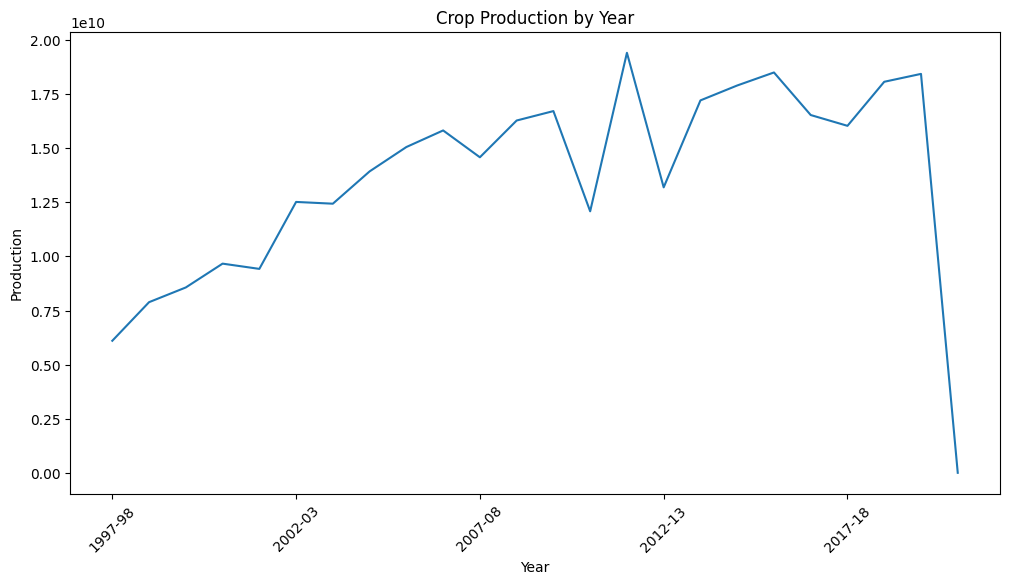

Year
1997-98   6.11e+09
1998-99   7.89e+09
1999-00   8.57e+09
2000-01   9.67e+09
2001-02   9.42e+09
2002-03   1.25e+10
2003-04   1.24e+10
2004-05   1.39e+10
2005-06   1.50e+10
2006-07   1.58e+10
2007-08   1.46e+10
2008-09   1.63e+10
2009-10   1.67e+10
2010-11   1.21e+10
2011-12   1.94e+10
2012-13   1.32e+10
2013-14   1.72e+10
2014-15   1.79e+10
2015-16   1.85e+10
2016-17   1.65e+10
2017-18   1.60e+10
2018-19   1.81e+10
2019-20   1.84e+10
2020-21   1.02e+07
Name: Production, dtype: float64


In [14]:
# Crop production by year
crop_by_year = data.groupby('Year')['Production'].sum()

plt.figure(figsize=(12, 6))
crop_by_year.plot(kind='line')
plt.title('Crop Production by Year')
plt.xlabel('Year')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()

print(crop_by_year)

# Function for top five crops with their production in each respective state:

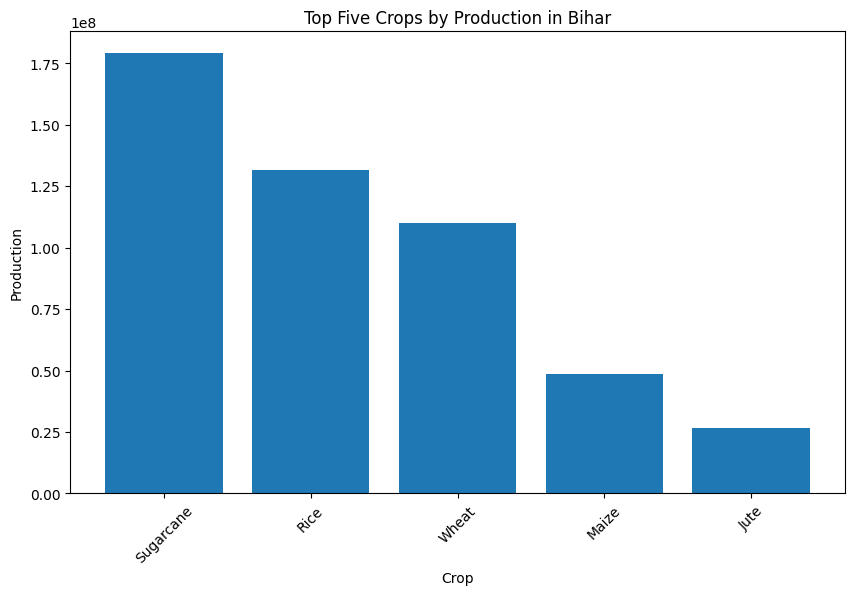

,Crop,Production
35,Sugarcane,1.79e+08
29,Rice,1.31e+08
41,Wheat,1.10e+08
17,Maize,4.88e+07
14,Jute,2.67e+07


In [15]:
def top_five_crops_by_state(data, state):
    state_data = data[data['State'] == state]

    crop_production = state_data.groupby('Crop')['Production'].sum().reset_index()

    sorted_crops = crop_production.sort_values('Production', ascending=False).head(5)
    
#   visualization

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_crops['Crop'], sorted_crops['Production'])
    plt.title(f'Top Five Crops by Production in {state}')
    plt.xlabel('Crop')
    plt.ylabel('Production')
    plt.xticks(rotation=45)
    plt.show()

    return sorted_crops

top_five_crops_by_state(data, 'Bihar')

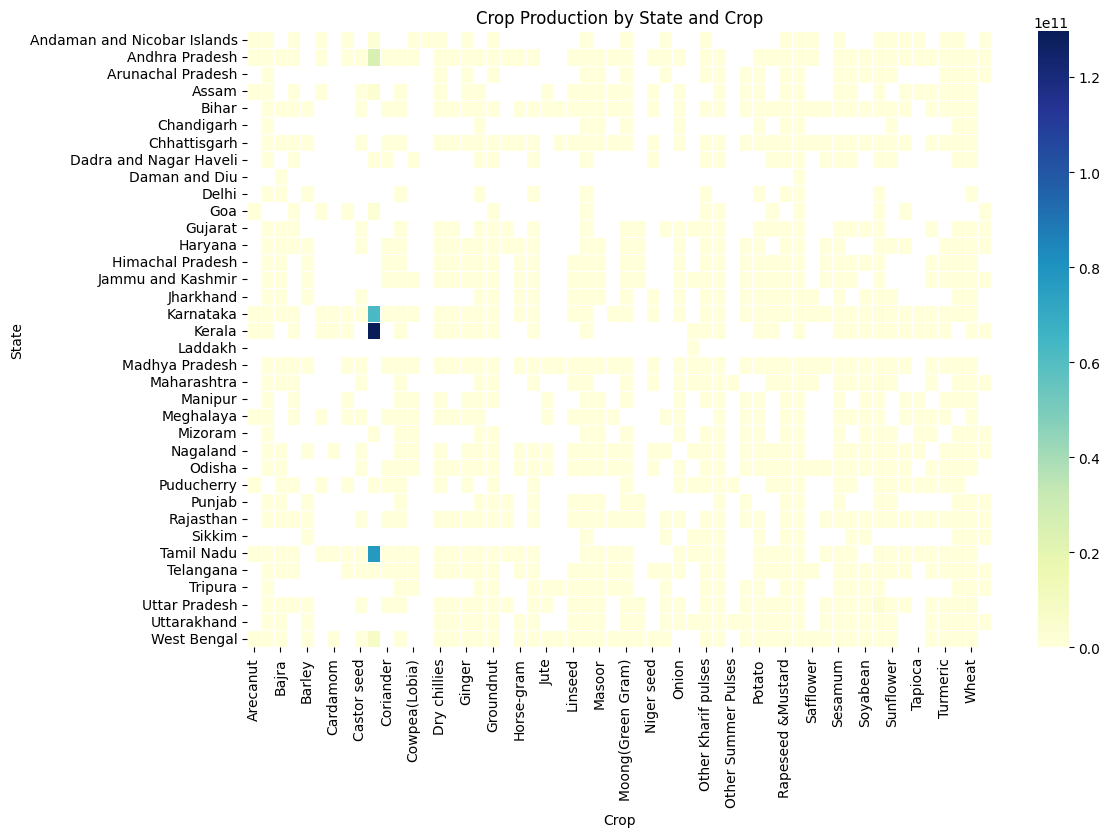

In [16]:
# Heatmap of crop production by state and crop
pivot_data = data.pivot_table(index='State', columns='Crop', values='Production', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Crop Production by State and Crop')
plt.xlabel('Crop')
plt.ylabel('State')
plt.show()

# Correlation

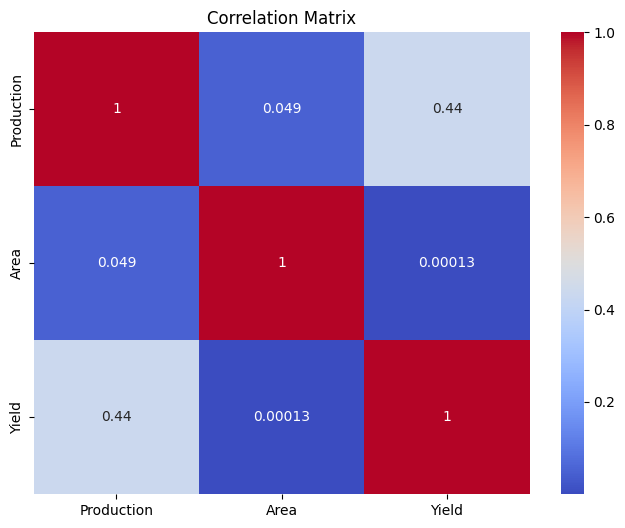

In [27]:
correlation_matrix = data[['Production', 'Area', 'Yield']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Season wise Crop production

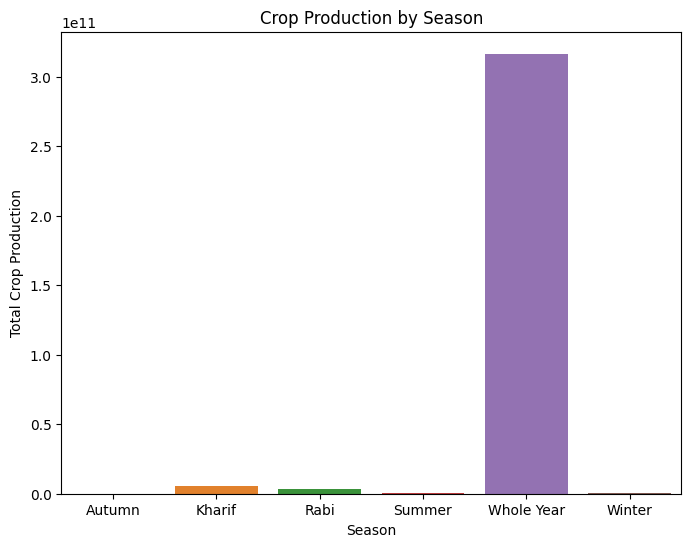

In [28]:
seasonal_production = data.groupby('Season')['Production'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_production.index, y=seasonal_production.values)
plt.xlabel('Season')
plt.ylabel('Total Crop Production')
plt.title('Crop Production by Season')
plt.show()

# No. of crops produced in each states

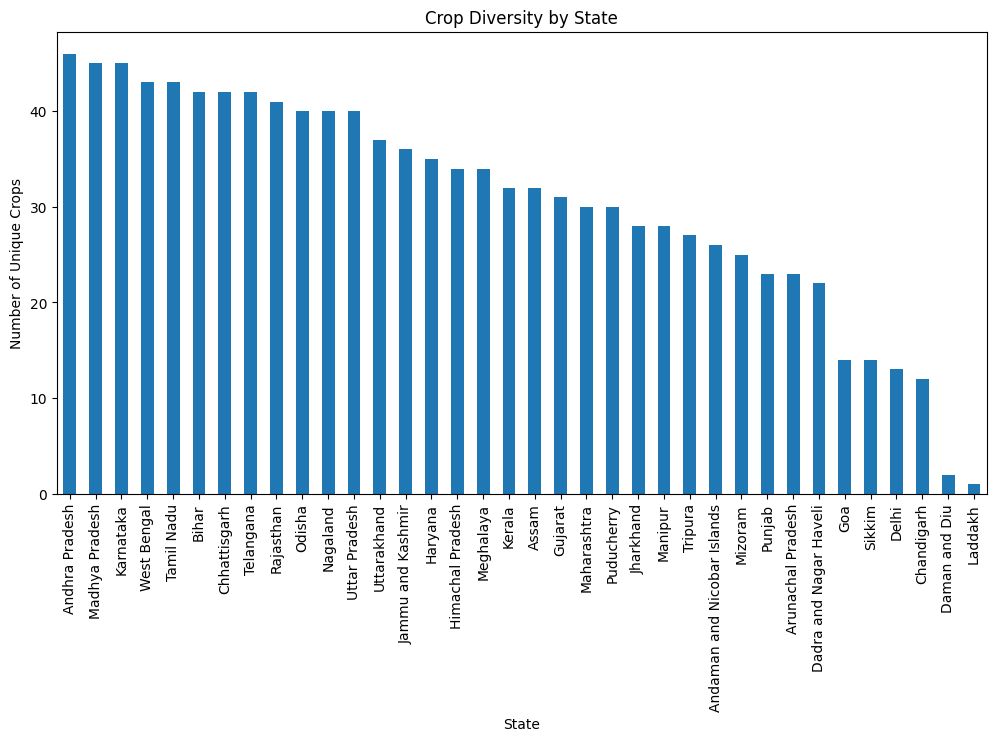

In [30]:
crop_count = data.groupby('State')['Crop'].nunique()

# Plot the crop diversity for each state
plt.figure(figsize=(12, 6))
crop_count.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Unique Crops')
plt.title('Crop Diversity by State')
plt.xticks(rotation=90)
plt.show()